# Data Augmentation

In this project we are trying to identify the presence, location and type of hemorrhage in order to quickly and effectively treat affected patients.

Below are the hemorrhage types:
1. Epidural
2. Intraparenchymal
3. Intraventricular
4. Subarachnoid
5. Subdural

Our training dataset consists of around 620K X-RAY images. A given X-RAY can have multiple types of hemorrhage or may not have a hemorrhage at all. Thus, our dataset will consist of images belonging either to the above five classes or to a `none` class. 

Running `preprocess.py` script before running this notebook will create a directory called `data` and place all the images in the right sub-folder depending on the class they belong to.

Now since we have the entire dataset segregated properly, let's start examining the dataset to determine if we need to augment any class or not.

### Strategy
As we know that if an image has hemorrhage, it can belong to multiple classes. Thus, a traditional CNN with the above classes as labels won't work. As a brute force strategy, we'll try to train five models, one for each class where our labels will be `<hemorrhage_class>, <no_hemorrhage>`. E.g. `epidural, none`

The `preprocess.py` script has placed all non-hemorrhage images in `none` folder.

Let's determine if the number of images in `<hemorrhage_class>` and `<no_hemorrhage>` class are balanced

In [14]:
import os
import numpy as np
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
from tqdm import tqdm

DATASET = './data/'
DCM_DATASET = './stage_1_train_images/'

NONE = 'none/'
total_no_hemorrhage = len(os.listdir(DATASET + NONE))

## Epidural
Let's see if we need to augment images in Epidural class or not

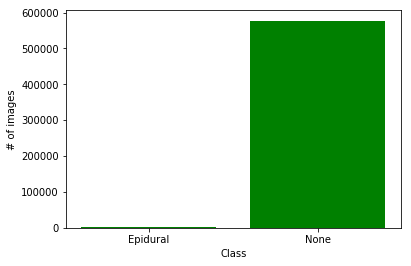

Total epidural images: 2761


In [9]:
def draw_bar_graph(x, y):
    x_pos = [i for i, _ in enumerate(x)]
    
    plt.bar(x_pos, y, color='green')
    plt.xlabel('Class')
    plt.ylabel('# of images')
    
    plt.xticks(x_pos, x)
    
    plt.show()

cls = ['Epidural', 'None']
y = [len(os.listdir(DATASET + 'epidural')), total_no_hemorrhage]
draw_bar_graph(cls, y)

print('Total epidural images: {}'.format(str(len(os.listdir(DATASET + 'epidural')))))

There is huge inbalance as there are 2.7k Epidural images and around 570k images not having hemorrhage. 

## Data Augmentation
We will perform synthetic sampling if ther is an inbalance between classes. For every image in unbalanced class, we'll generate its blurred and unsharped images and save them to disk. This would increase the number of images in the unbalanced class by 2x. But despite of augmentation, there is still a huge imbalance. In such cases, we'll ignore the excess images from `none` class during training.

In [10]:
def augmentation(path, filename):
    img = Image.open(path + filename + '.jpg')
    img = img.convert('RGB')
    img_blur = img.filter(ImageFilter.GaussianBlur)
    img_unsharp = img.filter(ImageFilter.UnsharpMask)
    
    img_blur.save(path + filename + '_blur.jpg')
    img_unsharp.save(path + filename + '_unsharp.jpg')

In [15]:
for f in tqdm(os.listdir(DATASET + 'epidural')):
    f_name = f.split('.')[0]
    augmentation(DATASET + 'epidural/', f_name)

100%|██████████████████████████████████████████████████████████████████████████████| 2761/2761 [01:58<00:00, 23.20it/s]


## Intraparenchymal
Let's see if we need to augment Intraparenchmyal class or not

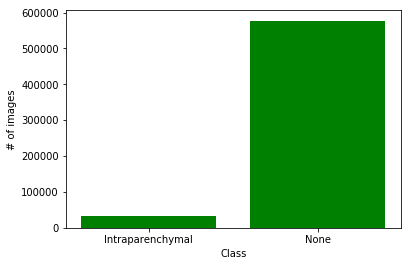

Total epidural images: 32564


100%|████████████████████████████████████████████████████████████████████████████| 32564/32564 [18:09<00:00, 29.89it/s]


In [16]:
cls = ['Intraparenchymal', 'None']
y = [len(os.listdir(DATASET + 'intraparenchymal')), total_no_hemorrhage]
draw_bar_graph(cls, y)

print('Total epidural images: {}'.format(str(len(os.listdir(DATASET + 'Intraparenchymal')))))

for f in tqdm(os.listdir(DATASET + 'intraparenchymal')):
    f_name = f.split('.')[0]
    augmentation(DATASET + 'intraparenchymal/', f_name)

## Intraventricular
Let's see if we need to augment Intraventricular class or not

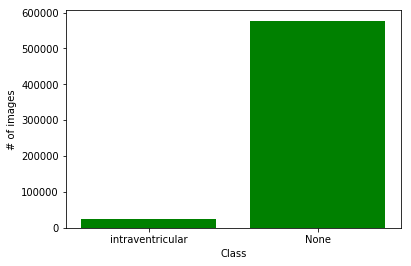

Total epidural images: 23766


100%|████████████████████████████████████████████████████████████████████████████| 23766/23766 [13:31<00:00, 29.29it/s]


In [17]:
cls = ['intraventricular', 'None']
y = [len(os.listdir(DATASET + 'intraventricular')), total_no_hemorrhage]
draw_bar_graph(cls, y)

print('Total epidural images: {}'.format(str(len(os.listdir(DATASET + 'intraventricular')))))

for f in tqdm(os.listdir(DATASET + 'intraventricular')):
    f_name = f.split('.')[0]
    augmentation(DATASET + 'intraventricular/', f_name)

## Subarachnoid
Let's see if we need to augment Subarachnoid class or not

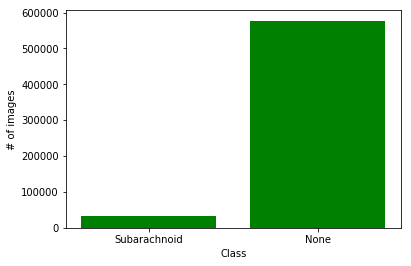

Total epidural images: 32122


100%|████████████████████████████████████████████████████████████████████████████| 32122/32122 [18:01<00:00, 29.69it/s]


In [18]:
cls = ['Subarachnoid', 'None']
y = [len(os.listdir(DATASET + 'subarachnoid')), total_no_hemorrhage]
draw_bar_graph(cls, y)

print('Total epidural images: {}'.format(str(len(os.listdir(DATASET + 'subarachnoid')))))

for f in tqdm(os.listdir(DATASET + 'subarachnoid')):
    f_name = f.split('.')[0]
    augmentation(DATASET + 'subarachnoid/', f_name)

## Subdural
Let's seeif we need to augment Subdural class or not

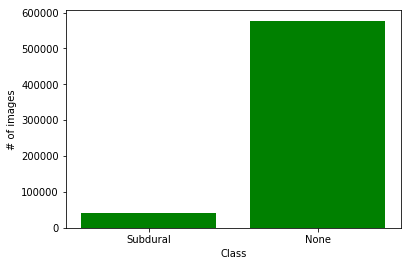

Total epidural images: 42496


100%|████████████████████████████████████████████████████████████████████████████| 42496/42496 [23:28<00:00, 30.18it/s]


In [19]:
cls = ['Subdural', 'None']
y = [len(os.listdir(DATASET + 'subdural')), total_no_hemorrhage]
draw_bar_graph(cls, y)

print('Total epidural images: {}'.format(str(len(os.listdir(DATASET + 'subdural')))))

for f in tqdm(os.listdir(DATASET + 'subdural')):
    f_name = f.split('.')[0]
    augmentation(DATASET + 'subdural/', f_name)